In [123]:
import pandas as pd
import numpy as np
import matplotlib as plt
import calendar

In [104]:
df = pd.read_csv("monatszahlen2209_verkehrsunfaelle.csv")

In [105]:
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [106]:
df= df[["MONATSZAHL","AUSPRÄGUNG","JAHR","MONAT","WERT"]]

In [107]:
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN


In [129]:
(df.groupby([df.JAHR,df.MONATSZAHL]).MONATSZAHL.count()).unstack()

MONATSZAHL,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
JAHR,,,
2000,26,26,39
2001,26,26,39
2002,26,26,39
2003,26,26,39
2004,26,26,39
2005,26,26,39
2006,26,26,39
2007,26,26,39
2008,26,26,39


In [108]:
df.shape

(2086, 5)

Filter data upto 2020

In [109]:
df_2020= df[df["JAHR"]<=2020]
df_2020=df_2020.reset_index(drop=True)

In [110]:
df_2020.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2020,Summe,430.0
1,Alkoholunfälle,insgesamt,2020,202001,28.0
2,Alkoholunfälle,insgesamt,2020,202002,40.0
3,Alkoholunfälle,insgesamt,2020,202003,27.0
4,Alkoholunfälle,insgesamt,2020,202004,26.0


In [111]:
df_2020.isnull().sum()

MONATSZAHL    0
AUSPRÄGUNG    0
JAHR          0
MONAT         0
WERT          0
dtype: int64

In [112]:
df_2020.JAHR.value_counts()

2020    91
2009    91
2001    91
2002    91
2003    91
2004    91
2005    91
2006    91
2007    91
2008    91
2010    91
2019    91
2011    91
2012    91
2013    91
2014    91
2015    91
2016    91
2017    91
2018    91
2000    91
Name: JAHR, dtype: int64

In [113]:
df_2020.AUSPRÄGUNG.value_counts()

insgesamt                 819
Verletzte und Getötete    819
mit Personenschäden       273
Name: AUSPRÄGUNG, dtype: int64

In [114]:
df_2020.MONATSZAHL.value_counts()

Verkehrsunfälle    819
Alkoholunfälle     546
Fluchtunfälle      546
Name: MONATSZAHL, dtype: int64

#### Changing the columnnames to English

In [115]:
df_2020.rename(columns={"MONATSZAHL":"Category","AUSPRÄGUNG":"Accident-type","JAHR":"Year","MONAT":"Month","WERT":"Value"}, inplace=True)
df_2020.head()

,Category,Accident-type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2020,Summe,430.0
1,Alkoholunfälle,insgesamt,2020,202001,28.0
2,Alkoholunfälle,insgesamt,2020,202002,40.0
3,Alkoholunfälle,insgesamt,2020,202003,27.0
4,Alkoholunfälle,insgesamt,2020,202004,26.0


In [116]:
df_2020.Month.value_counts()

Summe     147
200606      7
200705      7
200706      7
200707      7
         ... 
201305      7
201306      7
201307      7
201308      7
200012      7
Name: Month, Length: 253, dtype: int64

In [117]:
df.MONAT.value_counts()

Summe     154
202201      7
200711      7
200709      7
200708      7
         ... 
201402      7
201403      7
201404      7
201405      7
200012      7
Name: MONAT, Length: 277, dtype: int64

In [118]:
df_= df_2020[df_2020["Month"]=="Summe"]
df_

,Category,Accident-type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2020,Summe,430.0
13,Alkoholunfälle,insgesamt,2019,Summe,434.0
26,Alkoholunfälle,insgesamt,2018,Summe,398.0
39,Alkoholunfälle,insgesamt,2017,Summe,409.0
52,Alkoholunfälle,insgesamt,2016,Summe,301.0
...,...,...,...,...,...
1846,Verkehrsunfälle,Verletzte und Getötete,2004,Summe,6219.0
1859,Verkehrsunfälle,Verletzte und Getötete,2003,Summe,6365.0
1872,Verkehrsunfälle,Verletzte und Getötete,2002,Summe,7026.0
1885,Verkehrsunfälle,Verletzte und Getötete,2001,Summe,7452.0


In [119]:
df_2020.shape

(1911, 5)

Here the month column contains unexpected value "Summe".There is  no meaning so I am dropping 147 records

In [120]:
df_2020.drop(df_2020[df_2020["Month"]=="Summe"].index,inplace=True)
df_2020

,Category,Accident-type,Year,Month,Value
1,Alkoholunfälle,insgesamt,2020,202001,28.0
2,Alkoholunfälle,insgesamt,2020,202002,40.0
3,Alkoholunfälle,insgesamt,2020,202003,27.0
4,Alkoholunfälle,insgesamt,2020,202004,26.0
5,Alkoholunfälle,insgesamt,2020,202005,40.0
...,...,...,...,...,...
1906,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
1907,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
1908,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
1909,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [121]:
df_2020['Month'] = pd.to_numeric(df_2020['Month'].astype(str).str[-2:], errors='coerce')
df_2020

,Category,Accident-type,Year,Month,Value
1,Alkoholunfälle,insgesamt,2020,1,28.0
2,Alkoholunfälle,insgesamt,2020,2,40.0
3,Alkoholunfälle,insgesamt,2020,3,27.0
4,Alkoholunfälle,insgesamt,2020,4,26.0
5,Alkoholunfälle,insgesamt,2020,5,40.0
...,...,...,...,...,...
1906,Verkehrsunfälle,Verletzte und Getötete,2000,8,647.0
1907,Verkehrsunfälle,Verletzte und Getötete,2000,9,675.0
1908,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0
1909,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0


In [122]:
df_2020.Month.value_counts()

1     147
2     147
3     147
4     147
5     147
6     147
7     147
8     147
9     147
10    147
11    147
12    147
Name: Month, dtype: int64

Converting month to calender name

In [124]:
df_2020['Month'] = df_2020['Month'].apply(lambda x: calendar.month_abbr[x])
df_2020

,Category,Accident-type,Year,Month,Value
1,Alkoholunfälle,insgesamt,2020,Jan,28.0
2,Alkoholunfälle,insgesamt,2020,Feb,40.0
3,Alkoholunfälle,insgesamt,2020,Mar,27.0
4,Alkoholunfälle,insgesamt,2020,Apr,26.0
5,Alkoholunfälle,insgesamt,2020,May,40.0
...,...,...,...,...,...
1906,Verkehrsunfälle,Verletzte und Getötete,2000,Aug,647.0
1907,Verkehrsunfälle,Verletzte und Getötete,2000,Sep,675.0
1908,Verkehrsunfälle,Verletzte und Getötete,2000,Oct,615.0
1909,Verkehrsunfälle,Verletzte und Getötete,2000,Nov,578.0


### Data Analysis and Visualization
#### Number of accident per year by Category

In [125]:
(df_2020.groupby([df_2020.Year,df_2020.Category]).Category.count()).unstack()

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Year,,,
2000,24,24,36
2001,24,24,36
2002,24,24,36
2003,24,24,36
2004,24,24,36
2005,24,24,36
2006,24,24,36
2007,24,24,36
2008,24,24,36


Verkehrsunfälle    756
Alkoholunfälle     504
Fluchtunfälle      504
Name: Category, dtype: int64


<Axes: >

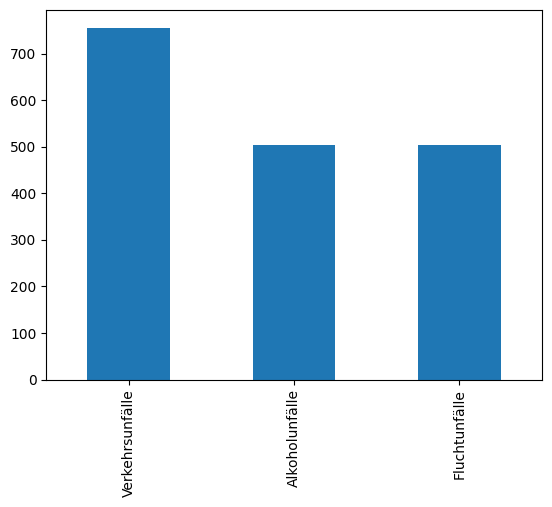

In [133]:
print(df_2020['Category'].value_counts())
df_2020['Category'].value_counts().plot(kind='bar')

From the above analysis Verkehrsunfälle accidents are high in all years.

#### Number of accident per Month by Category

In [130]:
(df_2020.groupby([df_2020["Accident-type"],df_2020.Category]).Category.count()).unstack()

Category,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
Accident-type,,,
Verletzte und Getötete,252.0,252.0,252.0
insgesamt,252.0,252.0,252.0
mit Personenschäden,NaN,NaN,252.0
